# Polynomial regression 

The example belows uses a temperature-energy dataset in order to illustrate how to perform a non linear regression.

Workflow:
1. Preparation
    - Extract the dataset from the _power_demand_vs_temperature.csv_ 
    - Explore the dataset and check for missing values
    - Plot the distribution
    - Divide the dataset into train and test 
    - Create an evaluation function
2. First experiment
    - Create a linear model 
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
3. Second experiment
    - Create a polynomial regression model with degree 2
    - Train the model on X_train and y_train
    - Evaluate the model on X_test and y_test
    - Visualize the prediction of the model
4. Third experiment
    - repeat the steps done in the second experiment but with degree 3
5. Third experiment
    - repeat the steps done in the second experiment but with degree 4
6. Compare the evaluation of each model


In [220]:
# Code source: Filippo Orazi 
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

random_state = 42 # this will be used to guarantee the repeatability of the experiment

## Dataset preparation

### Load the dataset from a `.csv` file
This cell allows full compatibility between execution in Google Colab and in local


In [221]:
try:
  import google.colab.files
  IN_COLAB = True
except:
  IN_COLAB = False
# from google.colab import files
if IN_COLAB:
    uploaded = files.upload()

df = pd.read_csv('power_demand_vs_temperature.csv')
df.head()

,date,demand,temp
0,2015-01-01,1.736065,1.7
1,2015-01-02,1.831672,2.2
2,2015-01-03,1.714934,14.4
3,2015-01-04,1.628577,15.6
4,2015-01-05,2.045394,0.0


The file must be available in the same directory, or uploaded in the Colab environment in the execution of the previous cell


Set the date column as index

In [222]:
df = df.set_index('date')
df.head()

,demand,temp
date,,
2015-01-01,1.736065,1.7
2015-01-02,1.831672,2.2
2015-01-03,1.714934,14.4
2015-01-04,1.628577,15.6
2015-01-05,2.045394,0.0


### Explore the dataset and check for missing values


In [223]:
df.describe(include='all')

,demand,temp
count,1096.000000,1096.000000
mean,1.831796,16.927737
std,0.329434,10.791581
min,1.316033,-15.000000
25%,1.581654,8.900000
50%,1.731479,18.900000
75%,2.024869,26.100000
max,2.804025,33.900000


In [224]:
df.isna().sum().sum() # quick way to count NA values

0

### Create X and y 

In [225]:
X = df.drop(labels=['demand'], axis=1)
y = df['demand']

print(X.shape, y.shape)

(1096, 1) (1096,)


### Plot the distribution



[]

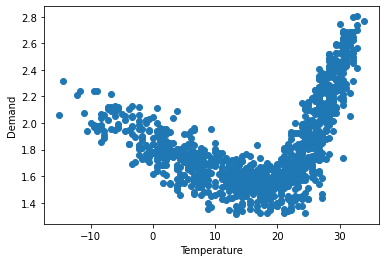

In [226]:
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.scatter(X, y)
plt.plot()

### Divide the dataset in train and test splits

In [227]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.7, random_state=random_state)

print("train size is {}, test size is {}".format(Xtrain.shape[0],Xtest.shape[0]))

train size is 767, test size is 329


### Create an evaluation function to compute, print and return the metrics: rmse r2 f-statistic and p-value

In [228]:
# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

def F_statistic(ytrue, ypred, p, n_obs) : # n_obv, aka row number, p is the number of regression params
    p = p + 1 # there's always another variable 
    ypred = np.array(ypred)
    ytrue = np.array(ytrue)
    y_true_avg = np.average(ytrue)
    SSE = np.sum((ytrue - ypred)**2)
    SSM = np.sum((ypred - y_true_avg)**2)
    DFM = p - 1
    DFE = n_obs - p
    F_stat = (SSM/DFM) / (SSE/DFE)
    p = 1-scipy.stats.f.cdf(F_stat, DFM, DFE) # how the fuck was i supposed to know this? 
    return F_stat, p
    
def print_all_metrics(X, y, model) :
    y_pred = model.predict(X) 
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    Fval, pval = F_statistic(y, y_pred, X.shape[1], X.shape[0])
    print("""
    rmse = {:.4}
    r2 = {:.4}
    F_stat = {:.3}
    p_val = {:.4}
    """.format(rmse, r2, Fval, pval))
    return Fval, pval, rmse, r2


## First experiment
Create a linear model 

Train the model on X_train and y_train 

Evaluate the model on X_test and y_test


In [229]:
lr_model = LinearRegression()
lr_model.fit(Xtrain, ytrain)
lin = print_all_metrics(Xtest, ytest, lr_model)


    rmse = 0.3188
    r2 = 0.1681
    F_stat = 44.6
    p_val = 1.05e-10
    


#### Visualize the prediction of the model 

[]

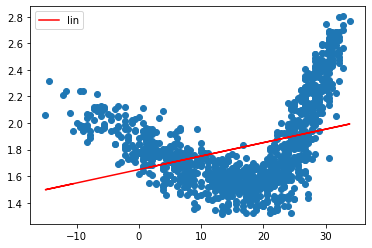

In [230]:
ypred_dt = lr_model.predict(X)
plt.plot(X, ypred_dt, label='lin', color='red')
plt.legend()
plt.scatter(X, y)
plt.plot()

## Second experiment - Polynomial regression
We can clearly see that the linear regression model cannot really approximate the data distribution.

We can now try with a non linear regression model:
1. Use the sklearn fucntion _PolynomialFeature_ to create a new array of features. Set _degree=2_ and _include_bias=False_
2. Train a Linear regression model with the new features
3. Evaluate the model 
4. Visualize the predicted values of the model

#### Polynomial degree = 2

In [231]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
lr_model_2 = LinearRegression()
Xtrans = poly_features.fit_transform(Xtrain)
lr_model_2.fit(Xtrans, ytrain)

LinearRegression()

In [232]:
pol2 = print_all_metrics(poly_features.fit_transform(Xtest), ytest, lr_model_2)


    rmse = 0.1829
    r2 = 0.7262
    F_stat = 3.85e+02
    p_val = 1.11e-16
    


[]

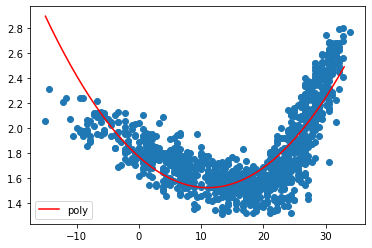

In [233]:
X_plt = np.arange(min(X.temp), max(X.temp)).reshape(-1, 1) # had to it in this way, or else it would come out all bugged
# ypred_dt_2 = lr_model_2.predict(poly_features.fit_transform(X))
# plt.plot(X, ypred_dt_2, label='poly', color='red')
ypred_dt_2 = lr_model_2.predict(poly_features.fit_transform(X_plt))
plt.plot(X_plt, ypred_dt_2, label='poly', color='red')
plt.legend()
plt.scatter(X, y)
plt.plot()

## Third experiment

#### Polynomial degree = 3

In [234]:
poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
lr_model_3 = LinearRegression()
Xtrans = poly_features_3.fit_transform(Xtrain)
lr_model_3.fit(Xtrans, ytrain)


LinearRegression()

In [235]:
pol3 = print_all_metrics(poly_features_3.fit_transform(Xtest), ytest, lr_model_3)


    rmse = 0.1475
    r2 = 0.822
    F_stat = 5.02e+02
    p_val = 1.11e-16
    


[]

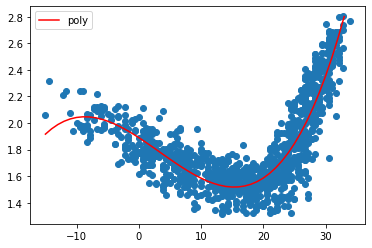

In [236]:
ypred_dt_3 = lr_model_3.predict(poly_features_3.fit_transform(X_plt))
plt.plot(X_plt, ypred_dt_3, label='poly', color='red')
plt.legend()
plt.scatter(X, y)
plt.plot()

## Fourth experiment
### Polynomial degree = 4

In [237]:
poly_features_4 = PolynomialFeatures(degree=4, include_bias=False)
lr_model_4 = LinearRegression()
Xtrans = poly_features_4.fit_transform(Xtrain)
lr_model_4.fit(Xtrans, ytrain)

LinearRegression()

In [238]:
pol4 = print_all_metrics(poly_features_4.fit_transform(Xtest), ytest, lr_model_4)


    rmse = 0.1461
    r2 = 0.8254
    F_stat = 3.9e+02
    p_val = 1.11e-16
    


[]

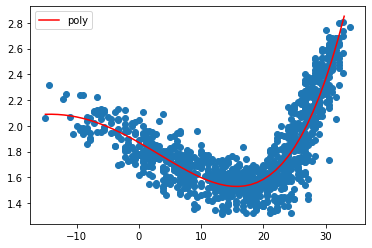

In [239]:
ypred_dt_4 = lr_model_4.predict(poly_features_4.fit_transform(X_plt))
plt.plot(X_plt, ypred_dt_4, label='poly', color='red')
plt.legend()
plt.scatter(X, y)
plt.plot()

## Compare the performance of the four models

In [250]:
vals = {'linear' : lin, 'pol d=2': pol2, 'pol d=3' : pol3, 'pol d=4' : pol4}
comp = pd.DataFrame(vals, index=['Fval', 'pval', 'rmse', 'r2'])
comp

,linear,pol d=2,pol d=3,pol d=4
Fval,4.457638e+01,3.848865e+02,5.023183e+02,3.900454e+02
pval,1.050272e-10,1.110223e-16,1.110223e-16,1.110223e-16
rmse,3.188273e-01,1.829105e-01,1.474768e-01,1.460612e-01
r2,1.680903e-01,7.261943e-01,8.220029e-01,8.254037e-01
